In [1]:
import numpy as np
from numpy import random
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
import umap

In [2]:
from prosstt import simulation as sim
from prosstt import tree
from prosstt import sim_utils as sut

In [3]:
random.seed(1992) # truly random

# Preparation

Define a simple single bifurcation tree. We will use this as the underlying biological truth, and will utilise it for sanity checks. We won't bother with non-informative genes to keep this simple, may revisit later.

In [4]:
num_brpoints = 1

# sample the parameters randomly:
G = random.randint(100, 1001)
gene_scale = np.exp(sp.stats.norm.rvs(loc=0.7, scale=1, size=G))

alpha = np.exp(random.normal(loc=np.log(0.2), scale=np.log(1.5), size=G))
beta = np.exp(random.normal(loc=np.log(1), scale=np.log(1.5), size=G)) + 1

num_branches = 2 * num_brpoints + 1
top = tree.Tree.gen_random_topology(num_brpoints)

branches = np.unique(np.array(top).flatten())
time = {b: 50 for b in branches}

t = tree.Tree(topology=top, time=time, num_branches=num_branches, G=G)

Ms = {}
uMs, Ws, H = sim.simulate_lineage(t, a=0.05, intra_branch_tol=0)
gene_scale = sut.simulate_base_gene_exp(t, uMs)
Ms = {}
for branch in t.branches:
    Ms[branch] = np.exp(uMs[branch]) * gene_scale
t.add_genes(Ms)

/Users/papadopoulos/miniconda3/envs/ensomatosis/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [5]:
t.branch_times()

defaultdict(list, {0: [0, 49], 1: [50, 99], 2: [50, 99]})

Sample the tree at three points to create three populations of cells that should be distinguishable from each other:

In [6]:
X, pseudotime, branches, scalings = sim.sample_pseudotime_series(t, [150, 300], [15, 65], 0.1,
                                                                 alpha=alpha, beta=beta)

In [7]:
def calc_cpm(expr_mat):
    """
    Divide each cell by its library size and multiply with 10^6
    """
    norm = np.sum(expr_mat, axis=1)
    return (expr_mat.T / norm).T * 1e6

def calc_mean(expr_mat):
    """
    Divide each cell by its library size and multiply with the average library size
    """
    norm = np.sum(expr_mat, axis=1)
    return (expr_mat.T / norm * np.mean(norm)).T


def log_umap(expr_mat, pc_comps=10, normalise=None):
    """
    Log-transform the data, calculate PCA and then use components for UMAP.
    """
    if normalise == "cpm":
        normalised = calc_cpm(expr_mat)
    elif normalise == "mean":
        normalised = calc_mean(expr_mat)
    elif normalise is None:
        normalised = expr_mat
    else:
        print("'normalise' argument unacceptable.")
        raise ValueError

    pca = PCA(n_components=10)
    pca.fit(np.log(normalised.T+1))
    reducer = umap.UMAP()
    return reducer.fit_transform(pca.components_.T)

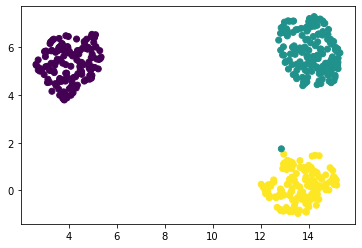

In [8]:
test = log_umap(X)

fig, ax = plt.subplots()
ax.scatter(test[:, 0], test[:, 1], c=branches);

In [9]:
expr = X
labels = branches
samples = np.repeat(0, X.shape[0])
# platform = NULL
# k = NULL
min_cluster_size = 10 # min.cell.n
remove_outlier = 2 # remove.outlier.n
span = 0.5
r = 1
filter_low = False # filter
min_cells = 10 # min.cells
min_genes = 10 # min.genes
mt_method = "fdr" # mt.method

In [10]:
d = {"CellID": np.arange(X.shape[0]),
     "ct": labels,
     "sample": samples}
meta = pd.DataFrame(d)

In [11]:
for (i in 1:length(s)) {
      index1 <- tmp %>% dplyr::filter(sample == s[i]) %>% dplyr::pull(CellID)
      if(length(index1) >= min.cell.n){
        tmp.matr <- expr[,index1]
        if(isTRUE(filter)){
          print("Filtering out low-abundance genes and low-quality cells")
          tmp.matr <- matr.filter(tmp.matr, min.cells = min.cells, min.genes = min.genes)
        }else{
          tmp.matr <- tmp.matr
        }
        tmp.res <- SE_fun(tmp.matr, span = span, r = r)
        tmp.res <- ent.toli(tmp.res, tmp.matr, span = span, r = r, n = remove.outlier.n)
        rogue[i] <- CalculateRogue(tmp.res, platform = platform, k = k)
      }
      else{
        rogue[i] <- NA
      }
    }

SyntaxError: invalid syntax (<ipython-input-11-a32708e20301>, line 1)

In [12]:
def sample_rogue(meta, cluster, verbose=False):
    pass

In [13]:
cluster = 0
for s in np.unique(meta["sample"]):
    keep = (samples == s) & (meta["ct"] == cluster)
    # check if the cluster is too small to bother:
    if np.sum(keep) < min_cluster_size:
        if verbose:
            print("Skipping sample {} for cluster {}".format(s, cluster))
        continue
        
    # define our temporary subset:
    tmp = expr[keep]
    
    # check if we want to filter:
    if filter_low:
        if verbose:
            print("Filtering out genes expressed in <{} cells and cells with <{} genes.".format(min_cells, min_genes))
        tmp = filter_matrix(tmp, min_cells=min_cells, min_genes=min_genes)
    
    # now for the fun stuff:
#     tmp.res <- SE_fun(tmp.matr, span = span, r = r)
#     tmp.res <- ent.toli(tmp.res, tmp.matr, span = span, r = r, n = remove.outlier.n)
#     rogue[i] <- CalculateRogue(tmp.res, platform = platform, k = k)


In [ ]:
SE_fun <- function(expr, span = 0.5, r = 1, mt.method = "fdr", if.adj = T){
  ent_res <- ROGUE::Entropy(expr, r = r)
  ent_res <- ROGUE::entropy_fit(ent_res, span = span, mt.method = mt.method)
  if(!isTRUE(if.adj)){
    ent_res <- ent_res %>% dplyr::mutate(p.adj = p.value)
  }
  return(ent_res)
}

In [10]:
def entropy(expr, r=1):
    tmp = np.log(expr + 1)
    ent = np.mean(tmp, axis=0)
    mean_expr = np.log(np.mean(expr, axis=0) + r)
    return pd.DataFrame({"Gene": expr.columns, "mean.expr": mean_expr, "entropy": ent})

We will test with the same matrix in R and Python:

```
   Gene  mean.expr entropy
   <chr>     <dbl>   <dbl>
 1 1          2.29    1.83
 2 2          2.27    1.92
 3 3          2.61    2.19
 4 4          2.23    1.72
 5 5          2.46    2.09
 6 6          1.98    1.78
 7 7          2.39    2.11
 8 8          2.16    1.93
 9 9          2.66    2.23
10 10         2.37    1.88
```

In [11]:
test = pd.read_csv("/Volumes/arendt/npapadop/data/ensomatosis/rogue/test_matrix.csv", index_col=0).T
ent_res = entropy(test)
ent_res

Gene  mean.expr   entropy
1      1   2.293614  1.831089
2      2   2.267616  1.924046
3      3   2.605868  2.188101
4      4   2.226334  1.719068
5      5   2.460976  2.093807
6      6   1.981620  1.782538
7      7   2.385214  2.106073
8      8   2.164672  1.933189
9      9   2.659428  2.234117
10    10   2.368206  1.883614

Success so far!

In [12]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [32]:
prd = lowess(ent_res["entropy"], ent_res["mean.expr"], frac=span, return_sorted=False)

prd

array([1.84293791, 1.92394911, 2.19287245, 1.89804677, 2.08424391,
       1.78276915, 1.95922925, 1.93513137, 2.23077831, 1.90064292])

Similar enough I guess...
```
       1        2        3        4        5
1.879526 1.920458 2.187287 1.781353 2.113720
       6        7        8        9       10
1.782895 2.013346 1.925536 2.234388 1.947488
```

In [14]:
ds = prd - ent_res["entropy"]
norm = sp.stats.norm(np.mean(ds), np.std(ds))
pv = 1 - norm.cdf(ds)

pv

array([0.46550577, 0.53037347, 0.50393829, 0.00903939, 0.58129742,
       0.52859536, 0.98104781, 0.51930951, 0.54791103, 0.43756166])

In [16]:
d = {"Gene": ent_res["Gene"],
    "mean.expr": ent_res["mean.expr"],
    "entropy": ent_res["entropy"],
    "fit": prd,
    "ds": ds,
    "pv": pv}
tmp = pd.DataFrame(d)

In [17]:
tmp

Gene  mean.expr   entropy       fit        ds        pv
1      1   2.293614  1.831089  1.842938  0.011849  0.465506
2      2   2.267616  1.924046  1.923949 -0.000096  0.530373
3      3   2.605868  2.188101  2.192872  0.004772  0.503938
4      4   2.226334  1.719068  1.898047  0.178979  0.009039
5      5   2.460976  2.093807  2.084244 -0.009564  0.581297
6      6   1.981620  1.782538  1.782769  0.000232  0.528595
7      7   2.385214  2.106073  1.959229 -0.146844  0.981048
8      8   2.164672  1.933189  1.935131  0.001943  0.519310
9      9   2.659428  2.234117  2.230778 -0.003338  0.547911
10    10   2.368206  1.883614  1.900643  0.017029  0.437562


```
   Gene  mean.expr entropy   fit        ds    pv
   <chr>     <dbl>   <dbl> <dbl>     <dbl> <dbl>
 1 1          2.29    1.83  1.88  0.0484   0.193
 2 2          2.27    1.92  1.92 -0.00359  0.609
 3 3          2.61    2.19  2.19 -0.000813 0.586
 4 4          2.23    1.72  1.78  0.0623   0.120
 5 5          2.46    2.09  2.11  0.0199   0.405
 6 6          1.98    1.78  1.78  0.000358 0.576
 7 7          2.39    2.11  2.01 -0.0927   0.987
 8 8          2.16    1.93  1.93 -0.00765  0.643
 9 9          2.66    2.23  2.23  0.000271 0.577
10 10         2.37    1.88  1.95  0.0639   0.114
```

In [20]:
keep = tmp["pv"] > 0.1
fit = lowess(tmp[keep]["entropy"], tmp[keep]["mean.expr"], frac=span)
lowess_x = fit[:, 0]
lowess_y = fit[:, 1]

prd = np.interp(ent_res["mean.expr"], lowess_x, lowess_y)

ds = prd - ent_res["entropy"]
norm = sp.stats.norm(np.mean(ds), np.std(ds))
pv = 1 - norm.cdf(ds)

tmp["fit"] = prd
tmp["ds"] = ds
tmp["pv"] = pv

In [21]:
tmp

Gene  mean.expr   entropy       fit            ds        pv
1      1   2.293614  1.831089  1.831089 -1.731948e-14  0.691887
2      2   2.267616  1.924046  1.924046  3.197442e-14  0.691887
3      3   2.605868  2.188101  2.192715  4.614317e-03  0.680383
4      4   2.226334  1.719068  2.071652  3.525844e-01  0.023998
5      5   2.460976  2.093807  2.093807  0.000000e+00  0.691887
6      6   1.981620  1.782538  1.782538 -6.661338e-16  0.691887
7      7   2.385214  2.106073  2.106073  0.000000e+00  0.691887
8      8   2.164672  1.933189  2.292129  3.589405e-01  0.021584
9      9   2.659428  2.234117  2.230948 -3.168305e-03  0.699680
10    10   2.368206  1.883614  1.883614  0.000000e+00  0.691887

```
   Gene  mean.expr entropy   fit        ds    pv
   <chr>     <dbl>   <dbl> <dbl>     <dbl> <dbl>
 1 1          2.29    1.83  1.88  0.0484   0.193
 2 2          2.27    1.92  1.92 -0.00359  0.609
 3 3          2.61    2.19  2.19 -0.000813 0.586
 4 4          2.23    1.72  1.78  0.0623   0.120
 5 5          2.46    2.09  2.11  0.0199   0.405
 6 6          1.98    1.78  1.78  0.000358 0.576
 7 7          2.39    2.11  2.01 -0.0927   0.987
 8 8          2.16    1.93  1.93 -0.00765  0.643
 9 9          2.66    2.23  2.23  0.000271 0.577
10 10         2.37    1.88  1.95  0.0639   0.114
```

In [22]:
keep = tmp["pv"] > 0.1
fit = lowess(tmp[keep]["entropy"], tmp[keep]["mean.expr"], frac=span)
lowess_x = fit[:, 0]
lowess_y = fit[:, 1]

prd = np.interp(ent_res["mean.expr"], lowess_x, lowess_y)

ds = prd - ent_res["entropy"]
norm = sp.stats.norm(np.mean(ds), np.std(ds))
pv = 1 - norm.cdf(ds)

tmp["fit"] = prd
tmp["ds"] = ds
tmp["pv"] = pv

In [23]:
tmp

Gene  mean.expr   entropy       fit        ds        pv
1      1   2.293614  1.831089  1.868391  0.037302  0.663380
2      2   2.267616  1.924046  1.902458 -0.021587  0.721725
3      3   2.605868  2.188101  2.188101  0.000000  0.700912
4      4   2.226334  1.719068  2.053181  0.334113  0.338589
5      5   2.460976  2.093807  2.104073  0.010266  0.690772
6      6   1.981620  1.782538  2.946644  1.164107  0.002892
7      7   2.385214  2.106073  2.018092 -0.087981  0.780958
8      8   2.164672  1.933189  2.278312  0.345124  0.327291
9      9   2.659428  2.234117  2.234117  0.000000  0.700912
10    10   2.368206  1.883614  1.968887  0.085273  0.612661

It is now saved in `.x`. Here we never lost any points due to low p values so everything stays the same.
```
   Gene  mean.expr entropy   fit        ds p.value
   <chr>     <dbl>   <dbl> <dbl>     <dbl>   <dbl>
 1 1          2.29    1.83  1.88  0.0484     0.193
 2 2          2.27    1.92  1.92 -0.00359    0.609
 3 3          2.61    2.19  2.19 -0.000813   0.586
 4 4          2.23    1.72  1.78  0.0623     0.120
 5 5          2.46    2.09  2.11  0.0199     0.405
 6 6          1.98    1.78  1.78  0.000358   0.576
 7 7          2.39    2.11  2.01 -0.0927     0.987
 8 8          2.16    1.93  1.93 -0.00765    0.643
 9 9          2.66    2.23  2.23  0.000271   0.577
10 10         2.37    1.88  1.95  0.0639     0.114
```

In [25]:
import statsmodels.stats.multitest as multi

In [24]:
rpvals = np.array([0.1927671, 0.6094952, 0.5858604, 0.1204553, 0.4053446, 0.5757823, 0.9874908, 0.6433898, 0.5765303, 0.1135792])

In [30]:
reject, pvals_corrected, alpha_sidac, alpha_bonf = multi.multipletests(rpvals, method="fdr_bh")

In [31]:
pvals_corrected

array([0.642557  , 0.71487756, 0.71487756, 0.6022765 , 0.71487756,
       0.71487756, 0.9874908 , 0.71487756, 0.71487756, 0.6022765 ])

The correction is identical, which means we found the correct function:
```
0.6425572 0.7148775 0.7148775 0.6022765 0.7148775
0.7148775 0.9874908 0.7148775 0.7148775 0.6022765
```

Gene  mean.expr   entropy
1      1   2.293614  1.831089
2      2   2.267616  1.924046
3      3   2.605868  2.188101
4      4   2.226334  1.719068
5      5   2.460976  2.093807
6      6   1.981620  1.782538
7      7   2.385214  2.106073
8      8   2.164672  1.933189
9      9   2.659428  2.234117
10    10   2.368206  1.883614

In [ ]:
def entropy_fit(mean_expr, ent, span=span, mt_method=mt_method):
    

In [ ]:
def expression_entropy_model():
    